# Background: 

- Bell's theorem: any physical theory that incorporates local realism cannot reproduce all the predictions of quantum mechanical theory.
- CHSH inquality: specific case of Bell's inequality 
- Historical significance: resolve EPR paradox argument

# Experiment:

- two beams of light (treat as quantum particles from distant locations) 
- measure the parity (S) of each system: 

$$ E = \frac{N_{vv}-N_{vh} - N_{hv}+N_{hh}}{N_{total}}$$
$$ S = E(\alpha,\beta)-E(\alpha,\beta')+E(\alpha',\beta)+E(\alpha',\beta')$$

- Experimental goal : show violation of CHSH inequality:  
    $$|S|\leq 2$$
to show that Quantum mechanics (following $|S|\leq 2\sqrt{2}$)is not a local hidden vairable theory.


# Experimental Setup
<img src="setup.jpg" width=500 style="padding: 0px; transform: rotate(-90deg);" /> 

# Calibration 


- Laser Power: 
    - vary laser input by 10 mW from 0~100mW
   - found that the optimal range is 20~60mW , the efficiency decreases after we go beyond 70 mW
   - $\therefore$ used P $\approx$ 40 mW throughout experiment
   - incident power > measured power 
     $\rightarrow$ possibly due to instrumentation/systematics issue

- Setting the 405 half wave plate as 40 deg to let in vertically polarized light. 

- Adjust the BBO angle, so that the light directly incident the detector (tested with a red laser backward tracing from detector $\rightarrow$ source)

- Calibrating the second set of waveplates : 

    - from varying the angle alpha, fixing beta, we saw a phase shift in the sinusodial
    - send in horizontally polarized light (from setting the first half wave plate at the default) then rotate $\alpha$ and $\beta$ waveplates so that they each independently attain maximum count rate. 
    - half wave plate need to adjust angle as half of the actual since that's the angle that the optical axis is adjusted. 
    - Calibration showed that the optical axes is zeroed when $\alpha$ = 140, $\beta$ = 60.

- Calibrating the phasor : 
    - rotate until maximize coincidence count 
    - obtained values 280 deg 


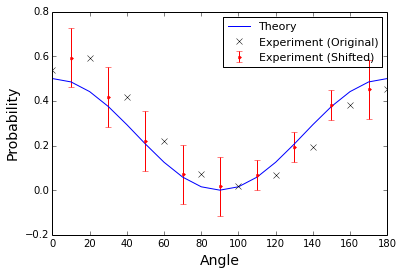

In [45]:
prob_list = []
prob_list2 = []
alpha_range=np.arange(0,360,10)
for alpha in alpha_range: 
    prob_list.append(compute_prob(1./sqrt(2),1./sqrt(2),alpha,0))
    prob_list2.append(compute_prob(sqrt(3.)/2,1./2,alpha,0))
alpha_range=np.arange(0,360,10)
shift = -10.0
count_exp = np.array([80.76, 89.14,62.5,33.18, 10.59,
                      2.61,10.39,28.79,57.38,67.76])
yerr = np.array([30, 20,20,20, 20, 20,10,10,10,20])
plt.xlabel("Angle",fontsize=14)
plt.ylabel("Probability",fontsize=14)
# plt.plot(alpha_range[:10]*2+shift,count_exp/150.,'.')
plt.plot(alpha_range,prob_list,'-',label="Theory")
plt.plot(alpha_range[:10]*2,count_exp/150.,'x', linewidth=12, 
         label= "Experiment (Original)",color="k")
plt.errorbar(alpha_range[:10]*2+shift,count_exp/150.,yerr=yerr/150.,
             fmt='.', label= "Experiment (Shifted)",color="red")

# plt.plot(alpha_range,prob_list2,'-',label="bad")
plt.xlim(0,180)
plt.legend(loc='upper right',prop={'size':11},numpoints=1)

In [18]:
def compute_prob(c_h, c_v, alpha_deg, beta_deg):
    beta = np.deg2rad(beta_deg)
    alpha = np.deg2rad(alpha_deg)
    P =(c_h*cos(alpha)*cos(beta)+c_v*sin(alpha)*sin(beta) )**2
    return P 
def E(a,b):
    ap = a+pi/2.
    bp = b+pi/2.
#     print "a,b: ",a,b
    E = P(a,b)+P(ap,bp)-P(ap,b)-P(a,bp)
    return E
def P(alpha, beta):
    P =0.5*(cos(beta-alpha))**2
    return P 

## Theoretical Values 

- assuming we have a perfect Bell state (i.e. C1 = C2= $\frac{1}{\sqrt{2}}$) 
$$ S = E(\alpha,\beta)-E(\alpha,\beta')+E(\alpha',\beta)+E(\alpha',\beta')= 2\sqrt{2}\approx 2.828$$

In [32]:
a1= -pi/4
a2 = 0.
b1 = -pi/8
b2 =  pi/8
print E(a1,b1)-E(a1,b2)+ E(a2,b1)+E(a2,b2)

2.82842712475


## Experimental Values 

E(a1,b2) = E(-45,22.5)

In [35]:
N = np.array([163.5,251.4,36,21.4])
print float(N[0]+N[1]-N[2]-N[3])/(sum(N))

0.756934152022


E(a1,b1)=E(-45,-22.5)

In [36]:
N = np.array([168.0,249.7,27.5,26.9])
print float(N[0]+N[1]-N[2]-N[3])/(sum(N))

0.76954035162


E(0,22.5)

In [37]:
N = np.array([29.8,20.9,168.6,265.8])
print float(N[0]+N[1]-N[2]-N[3])/(sum(N))

-0.790970933828


E(0,-22.5)

In [38]:
N = np.array([249,182.1,23.9,31.2 ])
print float(N[0]+N[1]-N[2]-N[3])/(sum(N))

0.773344302756


In [54]:
val = 0.76954035162+0.756934152022+0.790970933828+0.773344302756
print "Percent Error: ", abs(2*sqrt(2) - val)/2*sqrt(2) *100. , "% "

Percent Error:  18.5518384536 % 


In [47]:
0.756934152022 -- 0.790970933828+ 0.76954035162+ 0.773344302756

3.090789740226

# Error Propagation 

The equations that we are using in this experiment is : 
$P_{vv} = \frac{1}{2} cos^2 (\beta-\alpha)$

Using error propagation, we can derive the errors for P, E, which gives us the measure of uncertianty on S: 
$$\delta P (\alpha, \beta) = \delta \alpha \sqrt{\beta^2+\alpha^2} cos(\beta - \alpha) sin(\beta -\alpha)$$

$$\delta E(\alpha, \beta) = \sqrt{\delta P_{vv}^2+\delta P_{HH}^2+\delta P_{Hv}^2+\delta P_{vH}^2}$$

$$\delta S (\alpha, \beta) = \sqrt{\delta E_{ab}^2+\delta E_{ab'}^2+ \delta E_{a'b}^2+ \delta E_{a'b'}^2}$$

$$\delta S = 0.0137$$



In [4]:
d_alpha =np.deg2rad(1)
d_beta =np.deg2rad(1)
a = -45.
a1 = 0.
b = -22.5
b1=22.5
def dP(alpha,beta):
    alpha = np.deg2rad(alpha)
    beta = np.deg2rad(beta)
    return d_alpha*sqrt(beta**2+alpha**2)*cos(beta-alpha)*sin(beta-alpha)
def dE(a,b):
    return sqrt(dP(a,b)**2+dP(a,b1)**2+dP(a1,b)**2+dP(a1,b1)**2)
def dS(a,b):
    return sqrt(dE(a,b)**2+dE(a,b1)**2+dE(a1,b)**2+dE(a1,b1)**2)

In [11]:
sqrt(dE(a,b)**2+dE(a,b1)**2+dE(a1,b)**2+dE(a1,b1)**2)

0.013707783890401889

# Conclusion 

We obtained a value of $S = 3.09 \pm 0.0137$ from the 16 coincident rate measurement. Even though we showed that $S\geq2$ which disproves local hidden variable theory, according to the CHSH inequality. We also were unable to satisfy the quantum mechanics condition, based on calculating the probability of a pure Bell-state, of S$\leq 2\sqrt{2}$.

Other possible sources of error includes $\delta N$ which is the uncertainty in the number of counts from the avalanche photodiode and detector apparatus. By looking at the coincidence counts on the LabView program we estimate $\delta N \approx$ 10, which may add to compensate for the error.